# Introduction
A [Radar Chart](https://en.wikipedia.org/wiki/Radar_chart) (or Spyder Chart) is a method of plotting multiple variables on two dimensions. When we have several variables about something, we can plot each of them on an axis of a spyder plot. This can be especially useful when we want to compare several variables within a group, or between groups.\
We should, however, be aware of the possible problems that might arise when using these plots. Certain changes that we might need to make on our data in order to plot it effectively on a radar chart might cause confusions, especially when trying to compare variables.\
In this article, I will show you how to draw radar charts using both R and Python. Along the way, I will show you how certain decisions we make in preparing the data we use to draw these charts might have consequences that we might like or dislike. The most important aspect, in my opinion, is to be aware of such matters before we use these plots to convey any message.\
I will use a trial and error approach, trying to help you understand each step of the process.

First, Let's try to draw a radar chart in R.

# Radar Charts in R
## Setting R Up
First, I will load a few useful libraries.\
To draw radar plots, I will use the `fmsb`.

In [26]:
# install.packages("tidyverse")
# install.packages("fmsb")
library(tidyverse)
library(fmsb)

## Data
We will use the `mtcars` dataset. This dataset has different sorts of variables as well as variables that make sense to be used as groups. This will be useful as we shall see pretty soon.\
A description of the variables in this dataset is available [here](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars).\
Let's see what the dataset looks like.


In [17]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


## Drawing Radar Plots

The function to call when we try to draw a radar plot is, descriptively `radarchart`. You can find a summary of its arguments [here](https://rdrr.io/cran/fmsb/man/radarchart.html).\
Let's try to draw a radar chart for the first three cars in our dataset. We will set the `maxmin` argument to `False`. This will lead the function to calculate the minimum and maximum values on each axis automatically. It will basically use the highest value for each variable as the maximum, and vice-versa.


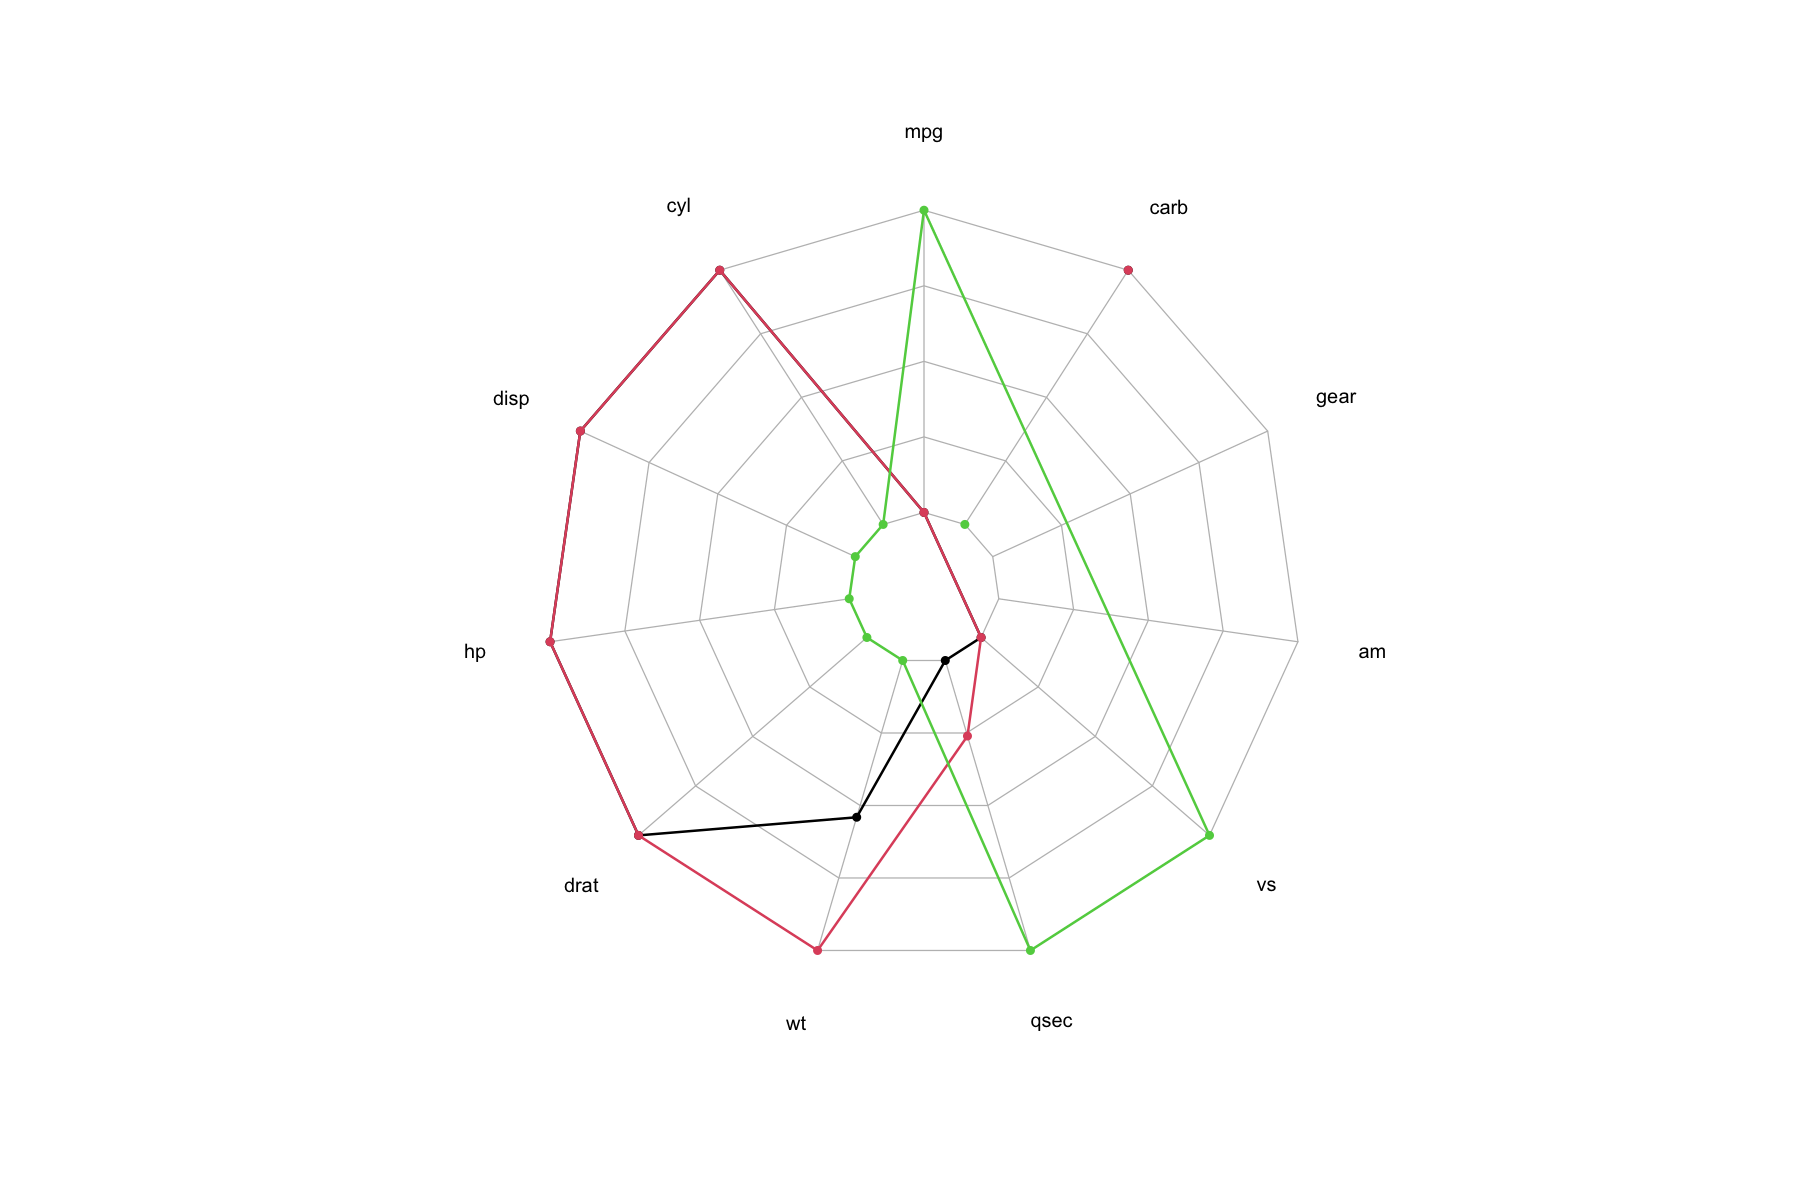

In [18]:
radarchart(
  df = mtcars[1:3,],
  maxmin = FALSE,  # Do we want the function to calculate minimums and maximums? If yes, we set false
  cglty = 1,       # Line type for radar grids
  cglcol = "gray", # Line color for radar grids
  plwd = 2,        # Line Widths for variables
  plty = 1,        # Line Types for variables
)


\
As you can see, the plot is not that useful. As we used `maxmin = FALSE`, any variable with two distinct values becomes a point in either the origin or maximum. The variables with only one distinct value (such as gear, which is 4 for all three cars) do not even show up in our plot. So, we should define minimums and maximums for each variable to fix this.

### Adding Maximum and Minimum Values
The `radarchart` function takes these minimums and maximums in a certain way. We should add two rows to the top of our dataframe, maximum values as row 1 and minimum values as row 2.\
Let's see what are the minimums and maximums for each variable. We would like to add some padding to each of these, to avoid having points on the origin or maximum.


In [20]:
max_min_finder <- function(data){
  max <- sapply(data,max)
  min <- sapply(data,min)
  return(data.frame(max,min))
}

max_min_finder(mtcars)


,max,min
,<dbl>,<dbl>
mpg,33.900,10.400
cyl,8.000,4.000
disp,472.000,71.100
hp,335.000,52.000
drat,4.930,2.760
wt,5.424,1.513
qsec,22.900,14.500
vs,1.000,0.000
am,1.000,0.000


In [21]:
maxmin_cars <- data.frame(
  mpg = c(34,9), #first maximum, then minimum, for each variable
  cyl = c(9,3),
  disp = c(500,50),
  hp = c(350,40),
  drat = c(5,2),
  wt = c(6,1),
  qsec = c(23,14),
  vs = c(2,0),
  am = c(2,0),
  gear = c(6,2),
  carb = c(10,0)
)

mtcars_max_min <- rbind(maxmin_cars,mtcars)

head(mtcars_max_min)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,34.0,9,500,350,5.00,6.000,23.00,2,2,6,10
2,9.0,3,50,40,2.00,1.000,14.00,0,0,2,0
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1


Now, let's draw our chart again using these maximum and minimum values. We will draw the chart for the first three cars.


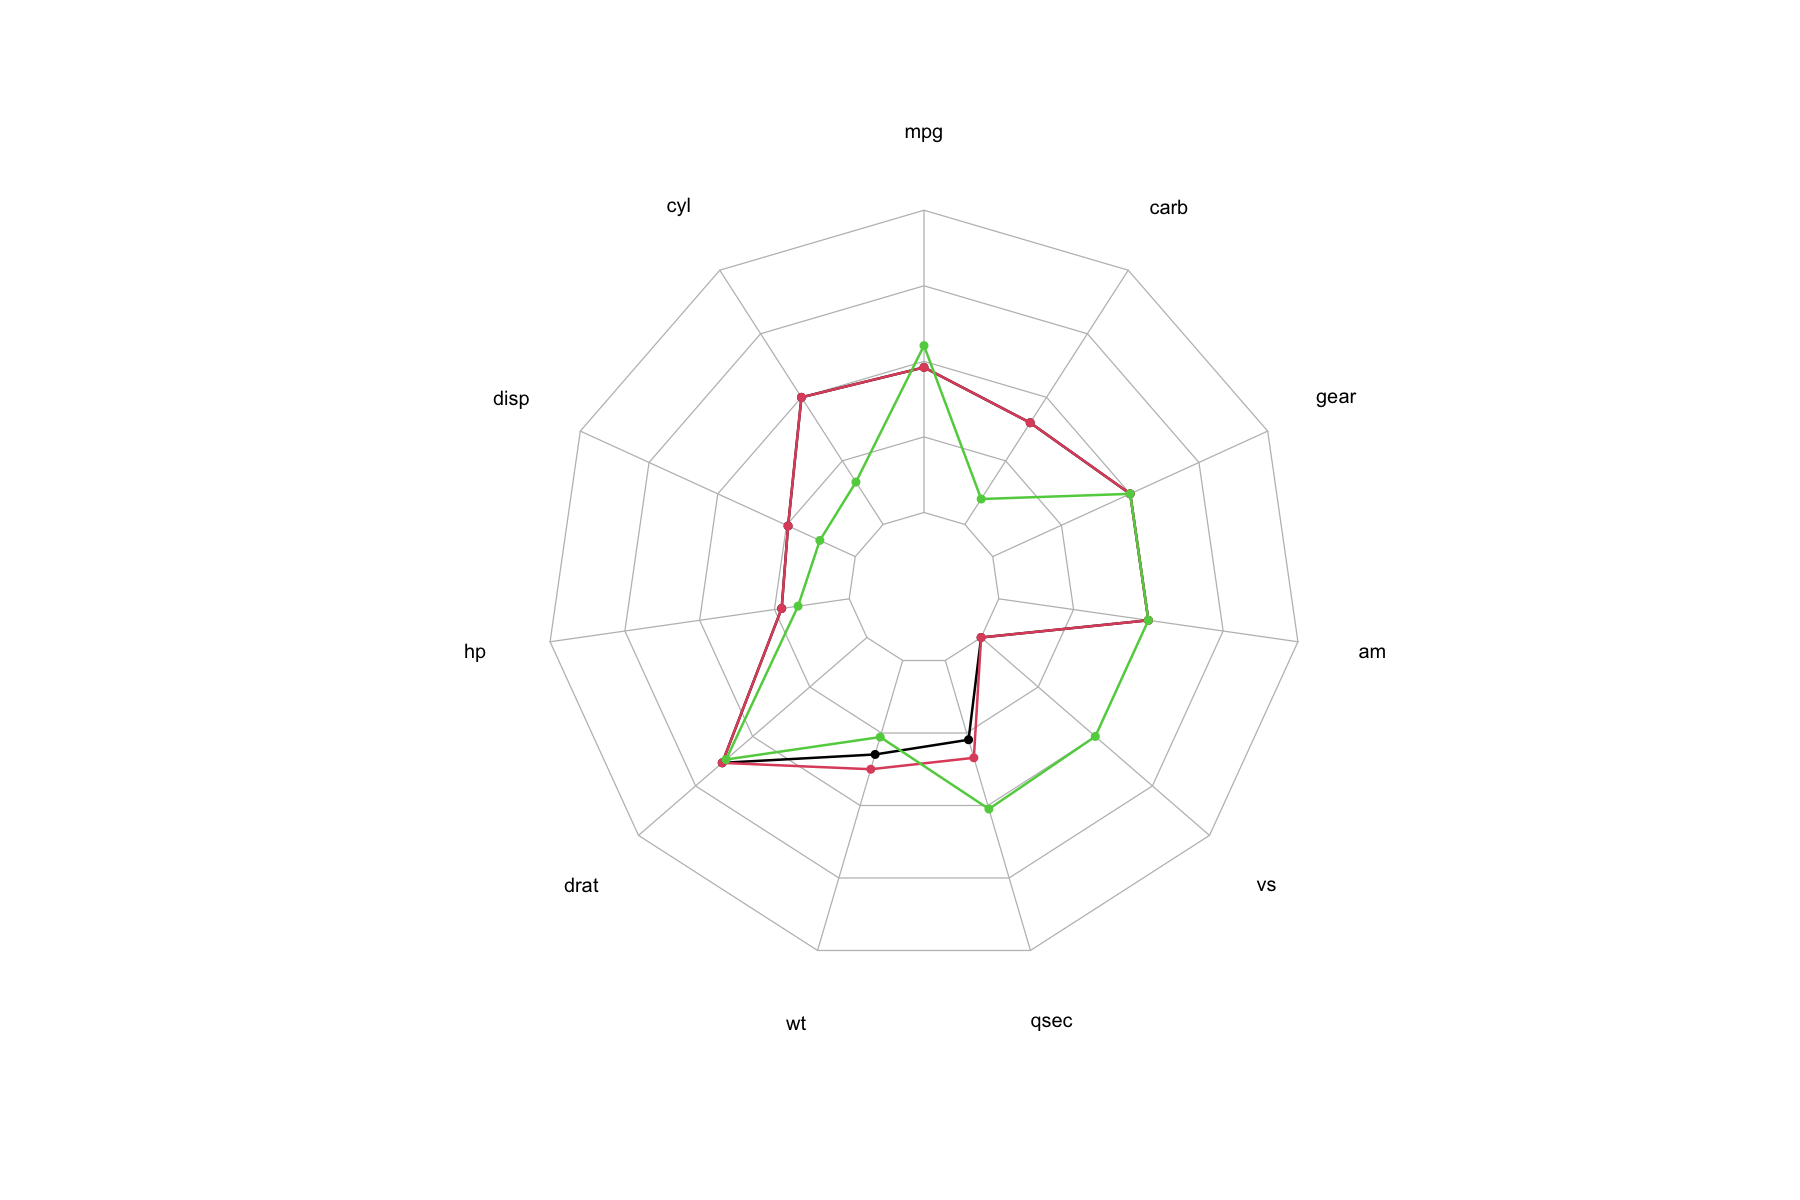

In [22]:
radarchart(
  df = mtcars_max_min[1:5,], #1 to 5 since the first two rows are maximum and minimum values.
  maxmin = TRUE,  # Do we want the function to calculate minimums and maximums? If yes, we set false
  cglty = 1,       # Line type for radar grids
  cglcol = "gray", # Line color for radar grids
  plwd = 2,        # Line Widths for variables
  plty = 1,        # Line Types for variables
)


\
Now, As you can see, the plot is much more informative. We can see that the car that is represented by red (we don't know which one it is, yet, as we do not have a legend), has more cylinders, higher horsepower, and lower miles per gallon compared to the green car.

### Adding a Legend
Now, Let's see which car is represented by which color by adding a legend. We should define our own colors for each car to use them in our legend. I will use a palette I found [here](https://colorhunt.co).


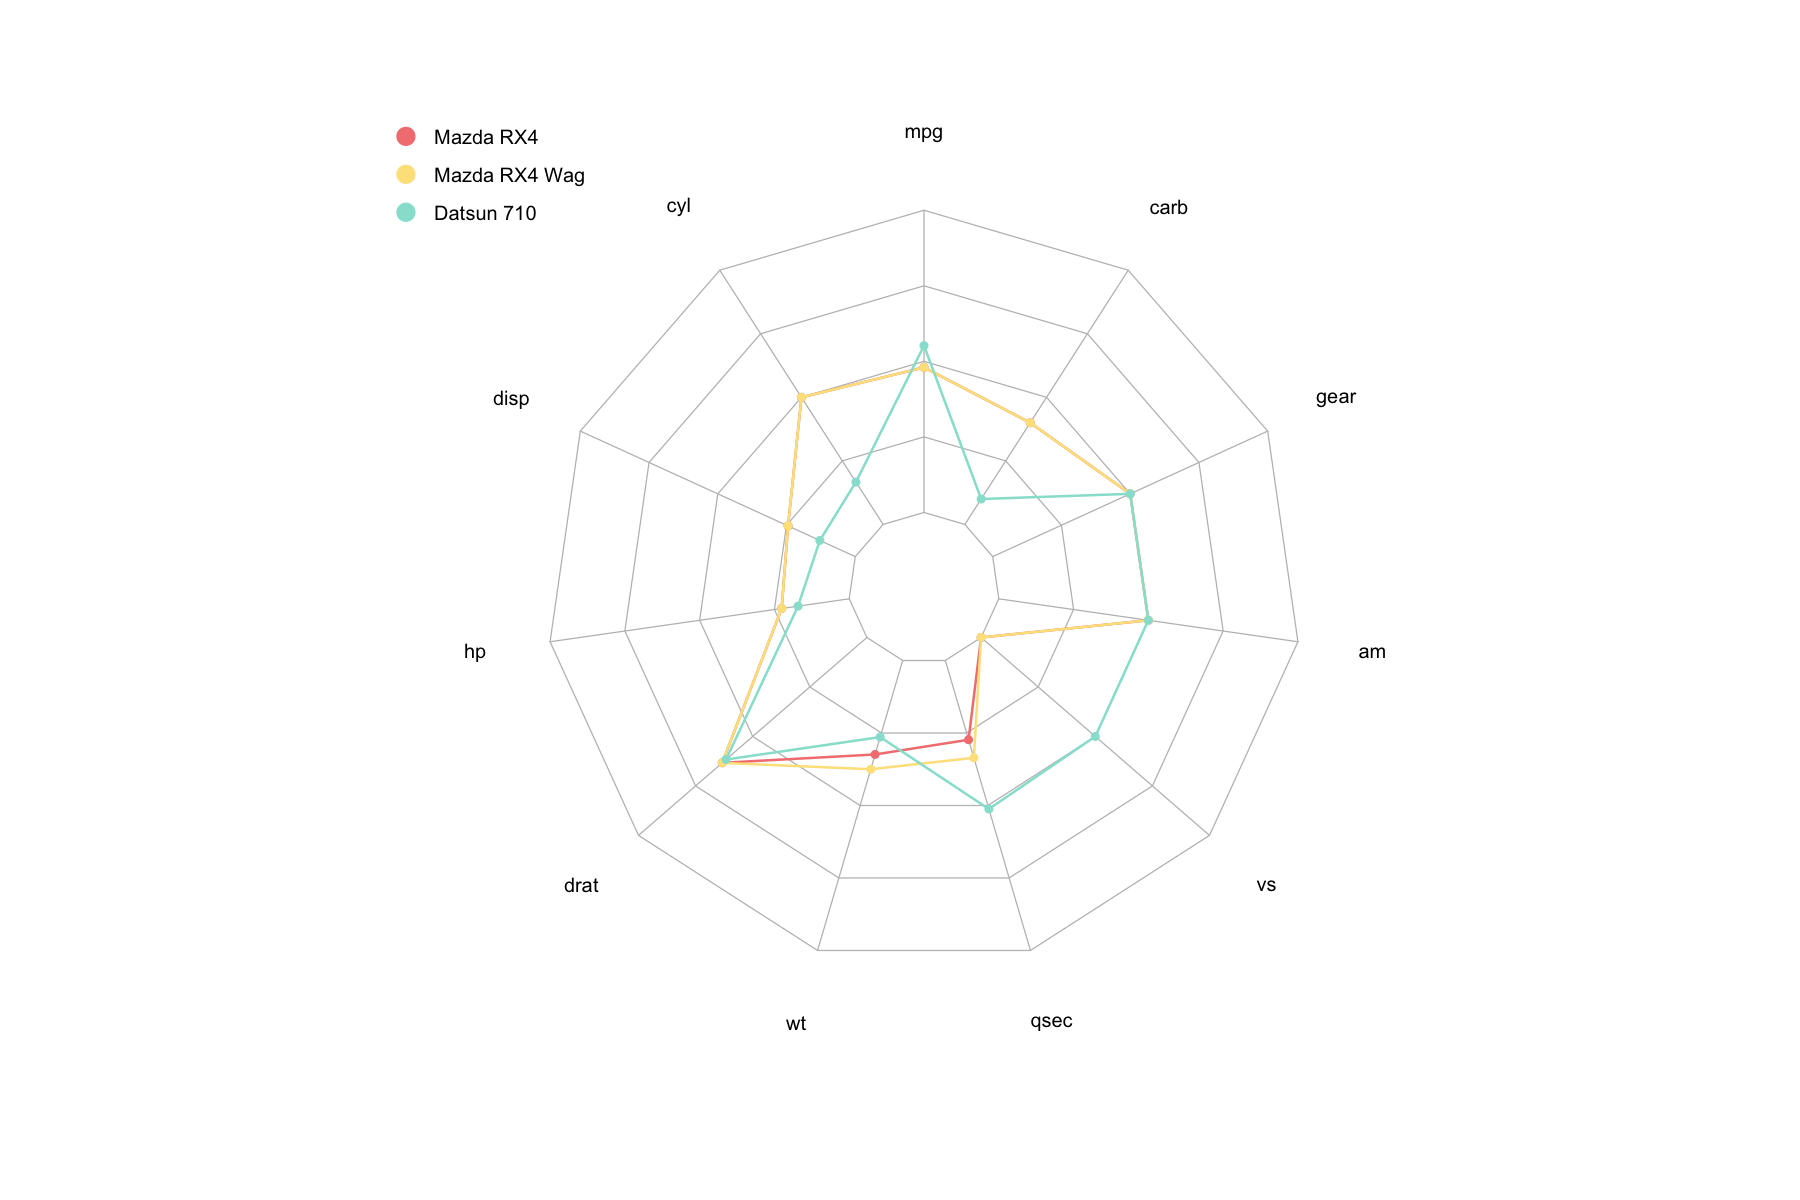

In [23]:
car_colors <- c("#F38181", "#FCE38A", "#95E1D3")

radarchart(
  df = mtcars_max_min[1:5,], #1 to 5 since the first two rows are maximum and minimum values.
  maxmin = TRUE,  # Do we want the function to calculate minimums and maximums? If yes, we set false
  pcol = car_colors, # Color for each line
  cglty = 1,       # Line type for radar grids
  cglcol = "gray", # Line color for radar grids
  plwd = 2,        # Line Widths for variables
  plty = 1,        # Line Types for variables
)

legend("topleft", #where do we want the legend
       legend = rownames(mtcars_max_min[3:5,]), #The names of the cars (remember, the first two rows are maximum and minimum)
       bty = "n", #the type of box used for the legend
       pch = 20, #the plotting symbols appearing in the legend
       col = car_colors, #same colors we used in the chart
       text.col = "Black",
       pt.cex = 3 #How big the points you want to be
)


\
Now, we can say that Mazda RX4 wagon was the car with more cylinders and lower miles per gallon in comparison to Datsun 710. We can also see that the wagon version of RX4 is heavier (wt) and slower to 1/4 mile (qsec) in comparison to the regular RX4. However, these cars are quite similar in other variables.

### Using Colored Areas
We can also use colors for areas covered by each of these cars using the `pfcol` argument. I will use the same colors I used for the lines. To have transparency, I will use the `alpha` function from the `scales` package.


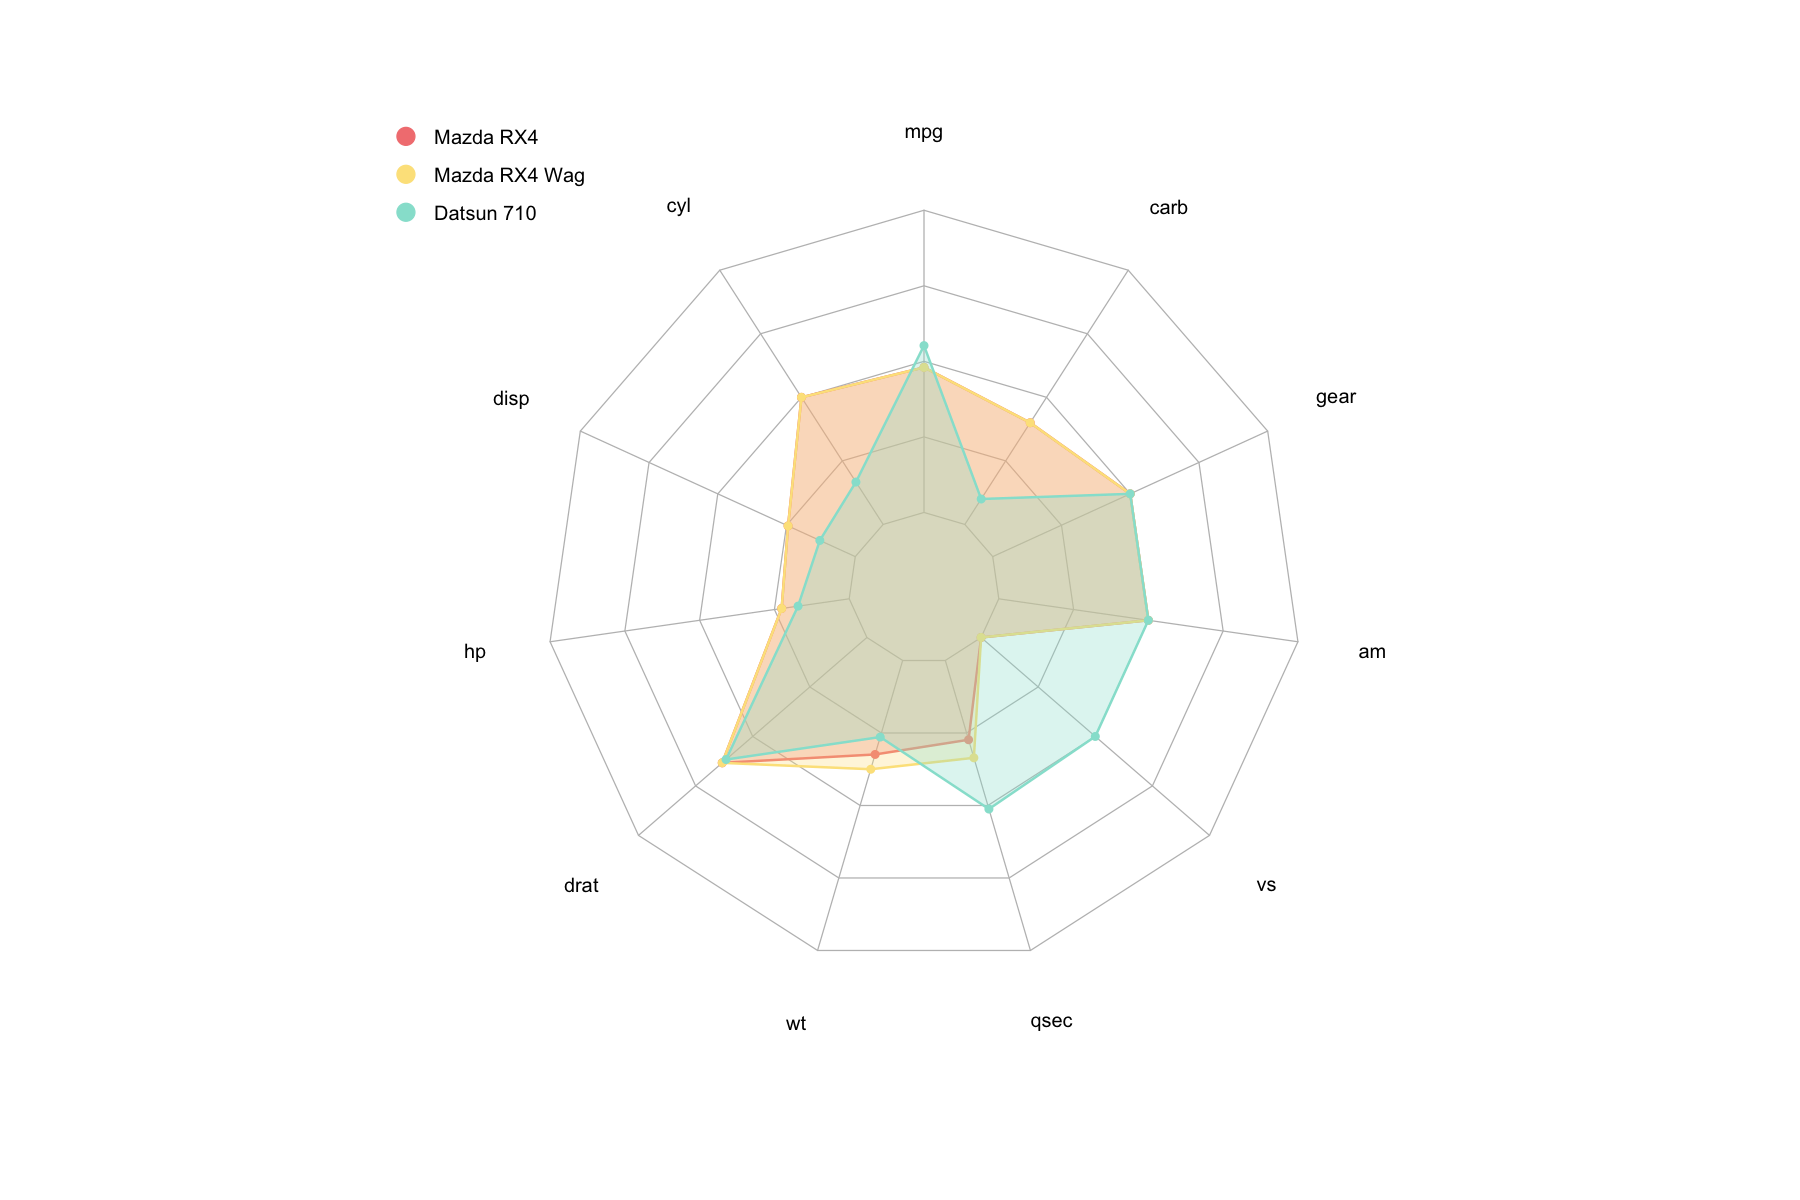

In [24]:
#install.packages("scales")
car_colors <- c("#F38181", "#FCE38A", "#95E1D3")

radarchart(
  df = mtcars_max_min[1:5,], #1 to 5 since the first two rows are maximum and minimum values.
  maxmin = TRUE,  # Do we want the function to calculate minimums and maximums? If yes, we set false
  pcol = car_colors, # Color for each line
  cglty = 1,       # Line type for radar grids
  cglcol = "gray", # Line color for radar grids
  plwd = 2,        # Line Widths for variables
  plty = 1,        # Line Types for variables
  pfcol = scales::alpha(car_colors, alpha = 0.3) #the lower the alpha, the higher the transparency.
)

legend("topleft", #where do we want the legend
       legend = rownames(mtcars_max_min[3:5,]), #The names of the cars (remember, the first two rows are maximum and minimum)
       bty = "n", #the type of box used for the legend
       pch = 20, #the plotting symbols appearing in the legend
       col = car_colors, #same colors we used in the chart
       text.col = "Black",
       pt.cex = 3 #How big the points you want to be
)


\
This is personal preference, but, I find it easier to compare the groups (the cars) when we also have these surfaces.
\
Now, let's see how we do it in Python.

# Radar Charts in Python

There are quite a few ways to plot radar charts in Python. I find `plotly go` the most intuitive method. Let's see how we can implement it. A more in depth tutorial is available [here](https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca).\
I will use the same cars dataset here, and enter the first three rows manually.\
Also, make sure to install `plotly` before trying to run these.\


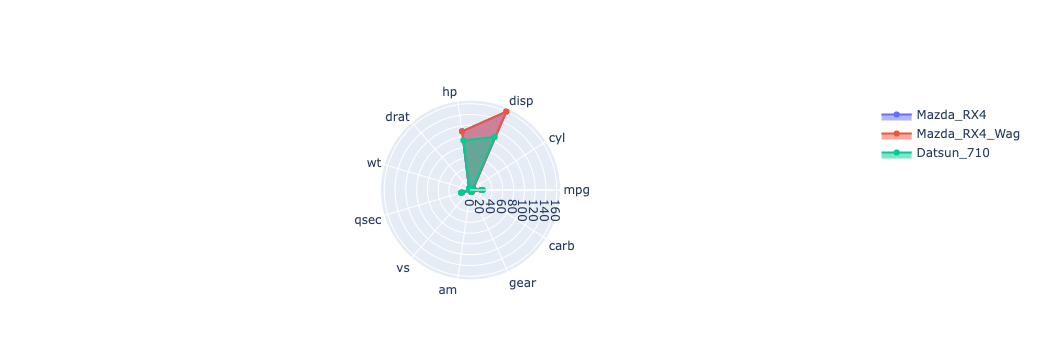

In [10]:
#! pip install plotly

import plotly.graph_objects as go

cars = ['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars = [*cars, cars[0]]

Mazda_RX4 = [21,6,160,110,3.9,2.62,16.46,0,1,4,4]
Mazda_RX4_Wag = [21,6,160,110,3.9,2.875,17.02,0,1,4,4]
Datsun_710 = [22.8,4,108,93,3.85,2.32,18.61,1,1,4,1]
Mazda_RX4 = [*Mazda_RX4, Mazda_RX4[0]]
Mazda_RX4_Wag = [*Mazda_RX4_Wag, Mazda_RX4_Wag[0]]
Datsun_710 = [*Datsun_710, Datsun_710[0]]


car_plot = go.Figure(
    data=[
        go.Scatterpolar(r=Mazda_RX4, theta=cars, name='Mazda_RX4', fill= "toself"),
        go.Scatterpolar(r=Mazda_RX4_Wag, theta=cars, name='Mazda_RX4_Wag', fill= "toself"),
        go.Scatterpolar(r=Datsun_710, theta=cars, name='Datsun_710', fill= "toself")
    ],
    layout=go.Layout(
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

car_plot


\
Here, our approach is a bit different. We are creating a plot using a radial axis. The angles (theta) correspond to our variables, and the radii correspond to the values for each car. This different approach leads to a completely different plot. Here, all of our variables are on the same scale. Hence, the cylinder counts look tiny compared to displacement, because, numerically, it is way smaller (160 vs 4). Nonetheless, one can say that the displacement of Mazda RX4 Wagon is numerically smaller than its horsepower, whatever that means.\
This difference is exactly one of the things that we should realize regarding the radar plots. If we want to use the axes to compare variables within each group (for each car here), we need to have our variables at the same scale. This sometimes does make sense, for example, when comparing the costs of groceries, rent, and travel for a household. They are all costs, and are more or less at the same scale. However, it makes no sense to compare a car's displacement to the number of its cylinders. What we are interested here, is to compare one car's number of cylinders to another car's number of cylinders.\
Based on above, it is important to be clear about what message we are trying to convey with a radar plot, both to ourselves and to our audience. we should clearly state that the axes do not represent equal amounts, if they do not.


## Using Different Scales
Now, let's try to use different scales for each variable to get a more useful result. We will divide each variable by a constant number, to make all values across variables closer to each other. This constant number will be a number a little higher than the maximum for each variable, as we found earlier.


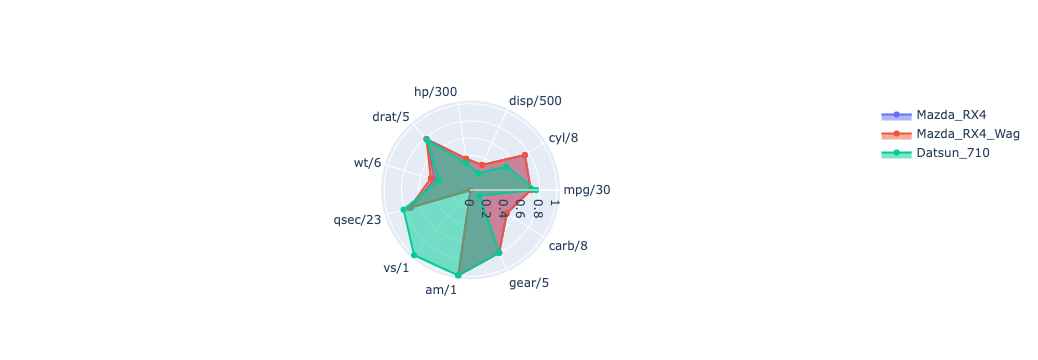

In [11]:
import plotly.graph_objects as go

cars = ['mpg/30','cyl/8','disp/500','hp/300','drat/5','wt/6','qsec/23','vs/1','am/1','gear/5','carb/8']
cars = [*cars, cars[0]]

scales=[30,8,500,300,5,6,23,1,1,5,8]
Mazda_RX4 = [21,6,160,110,3.9,2.62,16.46,0,1,4,4]
Mazda_RX4_Wag = [21,6,160,110,3.9,2.875,17.02,0,1,4,4]
Datsun_710 = [22.8,4,108,93,3.85,2.32,18.61,1,1,4,1]

Mazda_RX4 = [i / j for i, j in zip(Mazda_RX4, scales)]
Mazda_RX4_Wag = [i / j for i, j in zip(Mazda_RX4_Wag, scales)]
Datsun_710 = [i / j for i, j in zip(Datsun_710, scales)]

Mazda_RX4 = [*Mazda_RX4, Mazda_RX4[0]]
Mazda_RX4_Wag = [*Mazda_RX4_Wag, Mazda_RX4_Wag[0]]
Datsun_710 = [*Datsun_710, Datsun_710[0]]


car_plot = go.Figure(
    data=[
        go.Scatterpolar(r=Mazda_RX4, theta=cars, name='Mazda_RX4', fill= "toself"),
        go.Scatterpolar(r=Mazda_RX4_Wag, theta=cars, name='Mazda_RX4_Wag', fill= "toself"),
        go.Scatterpolar(r=Datsun_710, theta=cars, name='Datsun_710', fill= "toself")
    ],
    layout=go.Layout(
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

car_plot


\
Great, now, we have a much more informative plot, if we want to compare two cars. We also can compare the values across variables if we want, as we can multiply each radius by the constant which is written for each variable.\
Also, something cool about plotly is that it's interactive. We can click on each car name to make it invisible. Then, we can compare the other two cars.

# Conclusion
In this document, I tried to show you how you can use R and Python to draw radar plots. We used `fmsb` package in R and `plotly` in Python.\
A key takeaway from this article should be to be clear about your goals and the message you want to convey when you use radar plots. They are quite useful tools, but they can be misleading if you use different scales and try to compare across variables.
